## Day 25 Lecture 1 Assignment

In this assignment, we will evaluate the performance of the model we built yesterday on the Chicago traffic crash data. We will also perform hyperparameter tuning and evaluate a final model using additional metrics (e.g. AUC-ROC, precision, recall, etc.)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import statsmodels.api as sm

In [5]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')

In [6]:
def missingness_summary(df, print_log, sort):
  if print_log == True:
    series = pd.Series(df.isnull().sum()*100/df.isnull().count())
    if sort == 'Ascending':
      series = series.sort_values(ascending = True)
    elif sort == 'Descending':
      series = series.sort_values(ascending=False)
    elif sort == 'None':
      series
    else:
      return('Invalid sort parameter. Please select from: "Ascending", "Descending" and "None"')
    return series

In [7]:
damage =[]

for i in crash_data['DAMAGE']:
  if i == 'OVER $1,500':
    damage.append(1)
  else:
    damage.append(0)

In [8]:
crash_data['DAMAGE'] = damage

In [9]:
# dropping all columns with more than 5% missing data 
# and categorical columns with any missing data

objects = crash_data.select_dtypes(include='O')
objects = objects.columns

for i in crash_data:
  if crash_data[i].isnull().sum()*100/crash_data[i].isnull().count()  > 5:
    crash_data = crash_data.drop(i, axis=1)
  elif i in objects:
    if crash_data[i].isnull().sum()*100/crash_data[i].isnull().count() != 0:
      crash_data = crash_data.drop(i, axis=1)

print(missingness_summary(crash_data, True, 'Descending'))

INJURIES_UNKNOWN                 0.577586
INJURIES_NO_INDICATION           0.577586
INJURIES_REPORTED_NOT_EVIDENT    0.577586
INJURIES_NON_INCAPACITATING      0.577586
INJURIES_INCAPACITATING          0.577586
INJURIES_FATAL                   0.577586
INJURIES_TOTAL                   0.577586
NUM_UNITS                        0.375485
BEAT_OF_OCCURRENCE               0.001074
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
TRAFFICWAY_TYPE                  0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
DAMAGE                           0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
CRASH_TYPE                       0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0

In [10]:
# Imputing the median 
for i in crash_data.select_dtypes(exclude='O'):
  if i !='STREET_NO':
    crash_data[i] = crash_data[i].fillna(crash_data[i].median())

missingness_summary(crash_data, True, 'None')

RD_NO                            0.0
CRASH_DATE                       0.0
POSTED_SPEED_LIMIT               0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
CRASH_TYPE                       0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
SEC_CONTRIBUTORY_CAUSE           0.0
STREET_NO                        0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
INJURIES_NON_INCAPACITATING      0.0
INJURIES_REPORTED_NOT_EVIDENT    0.0
INJURIES_NO_INDICATION           0.0
INJURIES_UNKNOWN                 0.0
d

In [11]:
# set up an object to hold the features 
features = crash_data[['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'DAMAGE']]


# one hot encode categorical features
weather = pd.get_dummies(crash_data['WEATHER_CONDITION'])
weather.drop('CLEAR', axis=1)

crash_type = pd.get_dummies(crash_data['FIRST_CRASH_TYPE'])
crash_type.drop('REAR END', axis=1)

,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
372581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
features = pd.concat([features, weather], axis=1)
features = pd.concat([features, crash_type], axis=1)

In [13]:
Y = features['DAMAGE']
X = features.drop(['DAMAGE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

Since we will be building on the model we built in the last assignment, we will need to redo all of the data preparation steps up to the point of model building. These steps include creating the response, missing value imputation, and one-hot encoding our selected categorical variables. The quickest way to get going would be to open last week's assignment, make a copy, and build on it from there.

Statsmodels' implementation of logistic has certain advantages over scikit-learn's, such as clean, easy to read model summary output and statistical inference values (e.g. p-values). However, scikit-learn is preferable for model evaluation, so we will switch to the scikit-learn implementation for this exercise. 

Run logistic regression on the training set and use the resulting model to make predictions on the test set. Calculate the train and test error using logarithmic loss. How do they compare to each other?

In [37]:
# answer goes here
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)
print('test score: ' + str(test_score) + '\n' + 'train score: ' + str(train_score))

test score: 0.5858394728719621
train score: 0.5845847256330771


In [40]:
test_probs = lr.predict_proba(X_test)
train_probs = lr.predict_proba(X_train)
test_log_loss = log_loss(Y_test, test_probs)
train_log_loss = log_loss(Y_train, train_probs)
print('Test log loss', test_log_loss, '\nTrain log loss:', train_log_loss)

Test log loss 0.6565934599808979 
Train log loss: 0.6576070125768491


Next, evaluate the performance of the same model using 10-fold CV. Use the training data and labels, and print out the mean log loss for each of the 10 CV folds, as well as the overall CV-estimated test error. How do the estimates from the individual folds compare to the result from our previous single holdout set? How much variability in the estimated test error do you see across the 10 folds?

Note: scikit-learn's *cross_val_score* function provides a simple, one-line method for doing this. However, be careful - the default score returned by this function may not be log loss!

In [43]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr, X_train, Y_train, cv=10, scoring='neg_log_loss')
cv

array([-0.65829007, -0.65752478, -0.65917724, -0.66077262, -0.65925419,
       -0.65664705, -0.65577045, -0.6576991 , -0.65548403, -0.65649409])

Scikit-learn's logistic regression function has a built-in regularization parameter, C (the larger the value of C, the smaller the degree of regularization). Use a loop with values of C, and find the optimum C value by taking the highest average cross validation score.

In [47]:
# answer goes here
#c_vals = np.arange(0.05, 1.5, 0.05)
avg_cv_values = []

for c in [0.05, 0.25, 0.5, 0.75, 1]:
  lr = LogisticRegression(C=c, max_iter=1000)
  cv = cross_val_score(logit, X_train, Y_train, cv=5, scoring='neg_log_loss')
  avg_cv_values.append(cv.mean())

avg_cv_values

[-0.6577394532755747,
 -0.6577394532755747,
 -0.6577394532755747,
 -0.6577394532755747,
 -0.6577394532755747]

Re-train a logistic regression model using the best value of C identified by 10-fold CV on the training data and labels. Afterwards, do the following:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix
- Plot the ROC curve for our logistic regression model

Note: the performance of our simple logistic regression model with just four features will not be very good, but this is not entirely unexpected. There are many other features that can be incorporated into the model to improve its performance; feel free to experiment!

In [49]:
# answer goes here
from sklearn.metrics import classification_report
logit = LogisticRegression(max_iter=1000, C=1)
logit.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
train_predicted_Y = logit.predict(X_train)
print(classification_report(Y_train, train_predicted_Y))

              precision    recall  f1-score   support

           0       0.54      0.30      0.38    130201
           1       0.60      0.81      0.69    167867

    accuracy                           0.58    298068
   macro avg       0.57      0.55      0.54    298068
weighted avg       0.57      0.58      0.55    298068



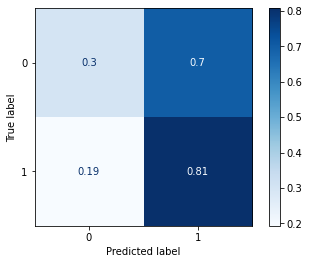

In [51]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(Y_train, train_predicted_Y, labels=[0,1])
plot_confusion_matrix(logit, X_test, Y_test, cmap='Blues', normalize='true')

In [53]:
from sklearn.metrics import roc_curve, auc
train_pred_probs = logit.predict_proba(X_train)
pred_probs = pd.Series(train_pred_probs[:, 1])
x, y, _ = roc_curve(Y_train, pred_probs)
roc_auc = auc(x, y)

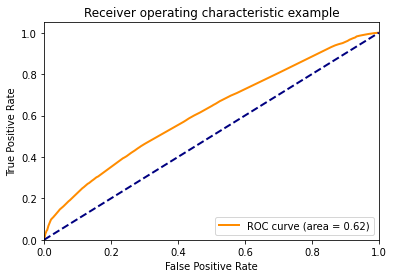

In [54]:
plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()